In [4]:
# Bibliotheken importieren

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

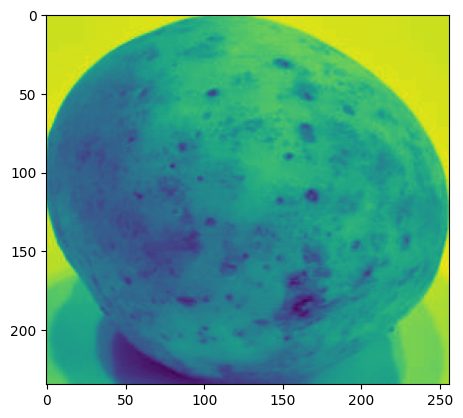

In [5]:
# Bild importieren

img_bgr = cv.imread(r'C:\Users\peter\Downloads\Testbilder\reduziert\kartoffel_107_cut_red.jpg')
gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY) # somit wird gleich richtig eingelesen, openCV arbeitet sonst mit BGR
plt.imshow(gray)

In [11]:
import glob

img = cv.threshold(img_bgr, 127, 255, cv.THRESH_BINARY)[1]  
ret, labels = cv.connectedComponents(img)
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0
cv.imshow('labeled.png', labeled_img)
cv.waitKey()

def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
        return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv.filter2D(img, cv.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
        return accum

filters=build_filters()
res1=process(img,filters)
cv.imshow('result',res1)
cv.waitKey(0)
cv.destroyAllWindows() 

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'
